# Thresholding
---
- Author: Diego Inácio
- GitHub: [github.com/diegoinacio](https://github.com/diegoinacio)
- Notebook: [thresholding.ipynb](https://github.com/diegoinacio/computer-vision-notebooks/blob/master/Computer-Vision-Fundamentals/thresholding.ipynb)
---
Methods which provides image binarization.

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import imageio

from _utils import *

In [2]:
import warnings
warnings.filterwarnings('ignore')

## 0. Input image
---

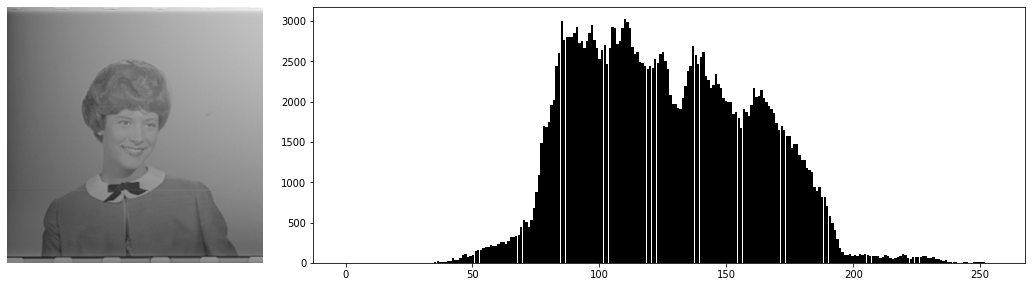

In [3]:
# Input and normalize to [0, 1]
img_in = imageio.imread('../_data/woman02.png')
# Relight input image
s, t = np.mgrid[1:0:512j, 0:1:512j]**(1/2.2)
img_in = (np.min(img_in, axis=2) + s*t*255)//2
img_in = img_in.astype('uint8')
# Visualization
histogram(img_in, bins=2**8, interval=[0, 255])

## 1. Global Thresholding
---
Given the value of threshold *T*:
$$ \large
g(x,y) = 
\begin{cases}
    1 &, \text{if } f(x,y) \gt T \\
    0 &, \text{if } f(x,y) \leq T
\end{cases}
$$

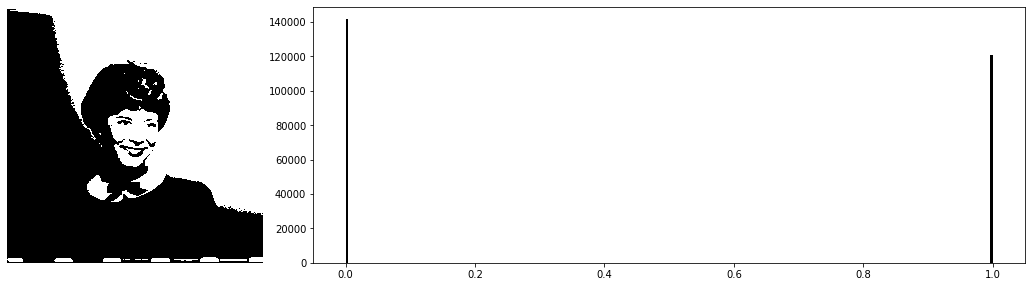

In [4]:
T = 127
img_gt = img_in > T
# Visualization
histogram(img_gt, bins=2**8, interval=[0, 1])

## 2. Adaptive Threshold
---
The *threshold* value for each pixel is the mean of its neighbourhood area minus the constant **C**. The neighbourhood is defined based on the value of radius **r**.

$$ \large
T(x,y)=\frac{\sum_{s=-r}^{r}\sum_{t=-r}^{r}f(x+s,y+t)}{(2r+1)^2} - C
$$

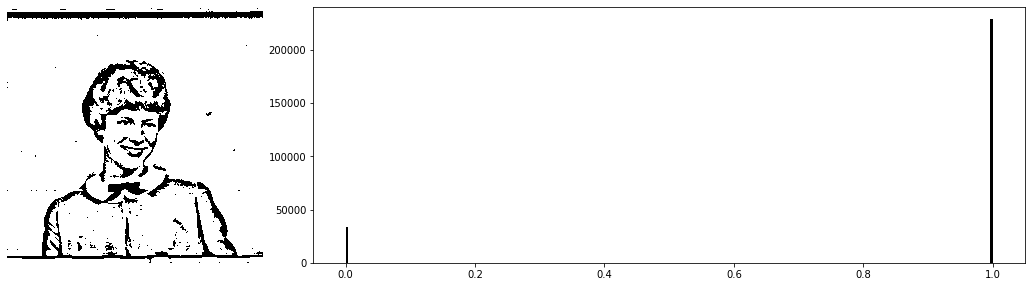

In [5]:
# Parameters "constant" (C) and "radius" (r)
C = 3
r = 13
# Imaging padding based on radius r
img_pad = np.pad(
    img_in,
    ((r, r), (r, r)),
    'edge'
)
# Init output image
img_at = img_pad.copy()
m, n = img_in.shape
for i in range(r, m + r):
    for j in range(r, n + r):
        block = img_pad[i-r:i+r+1,j-r:j+r+1]
        T = np.mean(block) - C
        img_at[i, j] = img_pad[i, j] > T
histogram(img_at[r:-r,r:-r], bins=2**8, interval=[0, 1])